## Relationship between epochs and cosine score
In this notebook I will explore the relationship between the number of epochs and the cosine similarity score between pairs of words. As I mentioned in my "Final Thoughts" section of the other file, I was curious to see the effect of increasing the number of epochs. This will be a fairly surface level analysis though, just to see what happens to the cosine scores as the number of epochs increases

The following code is essentially the same as the code I used in the other file.

In [16]:
from time import time 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 

warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 

In [49]:
# data downloaded from https://www.kaggle.com/muhammedfathi/game-of-thrones-book-files/code
book1 = open("----file location for got1.txt---",encoding="utf8") 
s1 = book1.read() 
book2 = open("----file location for got2.txt---",encoding="utf8") 
s2 = book2.read() 
book3 = open("----file location for got3.txt---",encoding="utf8") 
s3 = book3.read() 
book4 = open("----file location for got4.txt---",encoding="utf8") 
s4 = book4.read() 
book5 = open("----file location for got5.txt---",encoding="utf8") 
s5 = book5.read() 
s = s1+s2+s3+s4+s5
j = s.replace("\n", " ") 
data = [] 
wordcount = {}

j = j.replace(",","")
j = j.replace(":","")
j = j.replace("","")
j = j.replace('“',"")
j = j.replace('’',"")
j = j.replace('“',"")
j = j.replace('”',"")
j = j.replace("!","")
j = j.replace("?","")
j = j.replace(";","")
j = j.replace(",","")
j = j.replace("â€œ","")
j = j.replace("â€˜","")
j = j.replace("-","")

# iterate through each sentence in the file 
for i in sent_tokenize(j): 
    temp = [] 

    # tokenize the sentence into words 
    for ind,j in enumerate(word_tokenize(i)): 
        j = j.lower() 
        if(j != "" and j != "."):
            if j not in wordcount:
                wordcount[j] = 1
            else:
                wordcount[j] += 1
            temp.append(j)
    data.append(temp)

In [3]:
sg = []
cbow = []
for i in range(1,9):
    
    cbow.append(Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20))
    sg.append(Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     sg = 1,
                     negative=20))
    
    cbow[i-1].build_vocab(data, progress_per=10000)

    sg[i-1].build_vocab(data, progress_per=10000)

    t = time()

    cbow[i-1].train(data, total_examples=cbow[i-1].corpus_count, epochs=10*i)

    print('Time to train the CBOW model: {} mins'.format(round((time() - t) / 60, 2)), "for", 10*i, "epochs")
    
    t = time()

    sg[i-1].train(data, total_examples=sg[i-1].corpus_count, epochs=10*i)

    print('Time to train the Skip-Gram model: {} mins'.format(round((time() - t) / 60, 2)), "for epoch", 10*i)

Time to train the CBOW model: 0.24 mins for 10 epochs
Time to train the Skip-Gram model: 0.47 mins for epoch 10
Time to train the CBOW model: 0.49 mins for 20 epochs
Time to train the Skip-Gram model: 0.95 mins for epoch 20
Time to train the CBOW model: 0.74 mins for 30 epochs
Time to train the Skip-Gram model: 1.58 mins for epoch 30
Time to train the CBOW model: 0.99 mins for 40 epochs
Time to train the Skip-Gram model: 1.88 mins for epoch 40
Time to train the CBOW model: 1.23 mins for 50 epochs
Time to train the Skip-Gram model: 2.34 mins for epoch 50
Time to train the CBOW model: 1.47 mins for 60 epochs
Time to train the Skip-Gram model: 2.79 mins for epoch 60
Time to train the CBOW model: 1.72 mins for 70 epochs
Time to train the Skip-Gram model: 3.24 mins for epoch 70
Time to train the CBOW model: 1.94 mins for 80 epochs
Time to train the Skip-Gram model: 3.73 mins for epoch 80


In the following sections I will plot the cosine similarity scores for a pair of words for each model as the number of epochs increases

In [46]:
sg_score = []
cbow_score = []
for i in range(0,len(sg)):
    sg_score.append(sg[i].similarity("king","robert"))
    cbow_score.append(cbow[i].similarity("king","robert"))

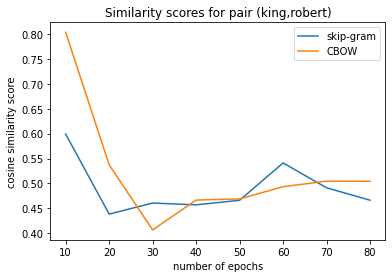

In [26]:
import matplotlib.pyplot as plt
x = [10*i for i in range(1,9)]
plt.plot(x,sg_score,label = "skip-gram")
plt.plot(x,cbow_score,label ="CBOW")
plt.title("Similarity scores for pair (king,robert)")
plt.ylabel('cosine similarity score')
plt.xlabel("number of epochs")
plt.legend()
plt.show()

There is a very clear initial decline in the similarity score as the epochs increase but then it appears to level out. There may be a slight increase as the number of epochs reaches around 50+ but this would need further analysis to state whether or not this is the case.

In [47]:
sg_score = []
cbow_score = []
for i in range(0,len(sg)):
    sg_score.append(sg[i].similarity("king","boot"))
    cbow_score.append(cbow[i].similarity("king","boot"))

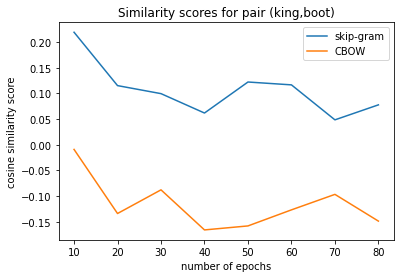

In [31]:
plt.plot(x,sg_score,label = "skip-gram")
plt.plot(x,cbow_score,label ="CBOW")
plt.title("Similarity scores for pair (king,boot)")

plt.ylabel('cosine similarity score')
plt.xlabel("number of epochs")
plt.legend()
plt.show()

As with the previous plot, there does appear to be a decline initially to later see the score level out. The inital decline is far less severe as the previous plot though.

In [28]:
sg_score = []
cbow_score = []
for i in range(0,len(sg)):
    sg_score.append(sg[i].similarity("king","queen"))
    cbow_score.append(cbow[i].similarity("king","queen"))

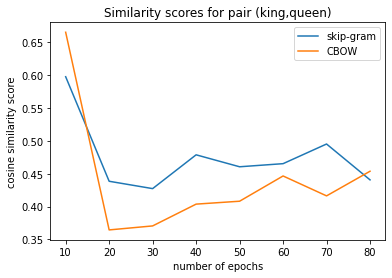

In [29]:
plt.plot(x,sg_score,label = "skip-gram")
plt.plot(x,cbow_score,label ="CBOW")
plt.title("Similarity scores for pair (king,queen)")

plt.ylabel('cosine similarity score')
plt.xlabel("number of epochs")
plt.legend()
plt.show()

There again is a significant drop in score initially with it later levelling out and potentially rising again. More epochs would need to be calculated for me to say for sure whether there is an actual increasing trend as the epochs increase or if it is simply due to chance.

In [38]:
sg_score = []
cbow_score = []
for i in range(0,len(sg)):
    sg_score.append(sg[i].similarity("boat","ceiling"))
    cbow_score.append(cbow[i].similarity("boat","ceiling"))

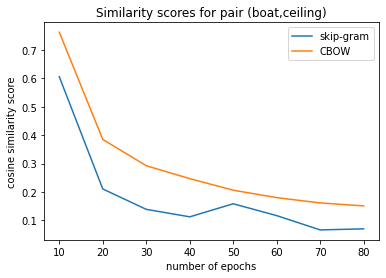

In [40]:
plt.plot(x,sg_score,label = "skip-gram")
plt.plot(x,cbow_score,label ="CBOW")
plt.title("Similarity scores for pair (boat,ceiling)")

plt.ylabel('cosine similarity score')
plt.xlabel("number of epochs")
plt.legend()
plt.show()

This plot is interesting because it looks like the decline in similarity is continuing through the 80th epoch as opposed to dropping significantly and then potentially rising.

In [43]:
sg_score = []
cbow_score = []
for i in range(0,len(sg)):
    sg_score.append(sg[i].similarity("nights","watch"))
    cbow_score.append(cbow[i].similarity("nights","watch"))

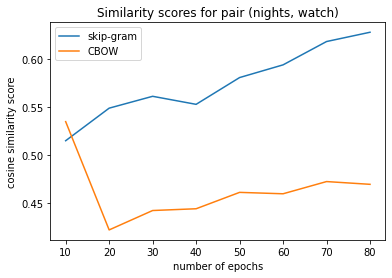

In [45]:
plt.plot(x,sg_score,label = "skip-gram")
plt.plot(x,cbow_score,label ="CBOW")
plt.title("Similarity scores for pair (nights, watch)")

plt.ylabel('cosine similarity score')
plt.xlabel("number of epochs")
plt.legend()
plt.show()

This plot is different from all the rest in that one model, the skip-gram, did not show a decline in similarity initially. It does appear that after the 10th epoch the two models follow a roughly similar trend upwards but compared to the other plots, this one shows significant difference.

## Final Thoughts
This file was not intended to be a super thorough analysis of the effect of epoch number on the similarity score but rather a more qualitative approach. I would have liked to keep increasing the epoch number to extend my analysis but it became very time consuming to go past 80 on my machine. I will note that the training does increase linearly, which you can see from the time taken to train each model as the epochs increase. This should be expected but it was nice to see a very clear linear relationship. 